In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/DL/fashion-mnist_train.csv")
test_data = pd.read_csv('/content/drive/MyDrive/DL/fashion-mnist_test.csv')

In [ ]:
y_train = train_data['label']
X_train = train_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1)
y_test = test_data['label']
X_test = test_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

labels = y_train.unique().tolist()
labels.sort()
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

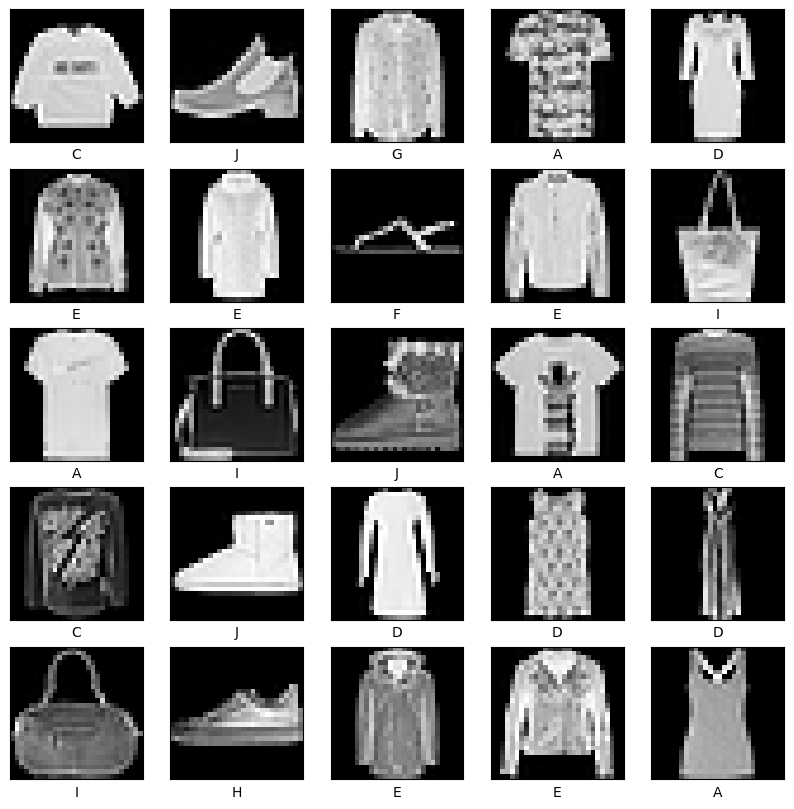

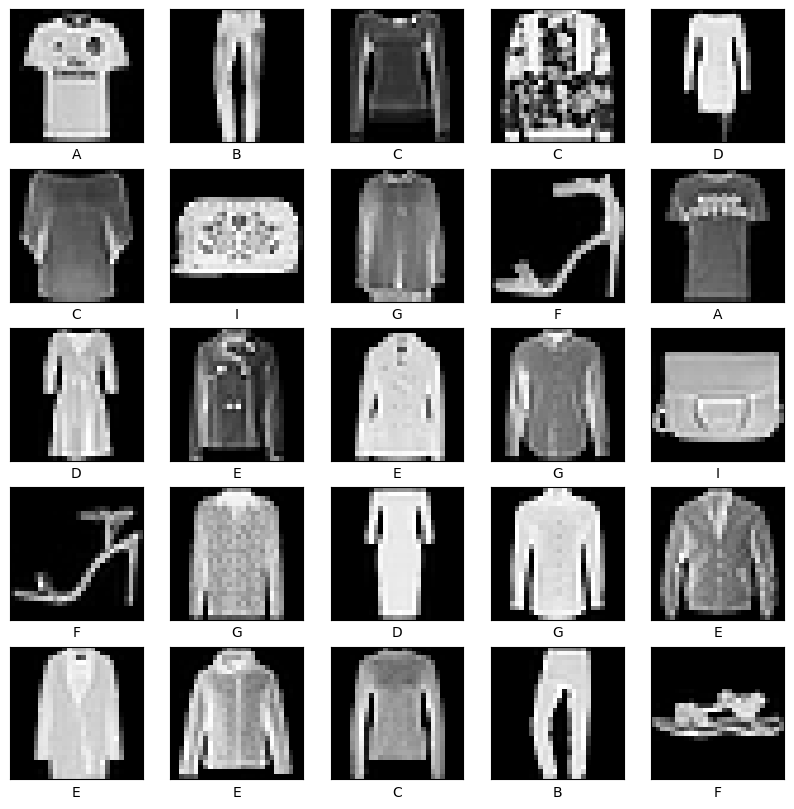

In [ ]:
classes = []
for label in labels:
    classes.append(chr(label + 65))
classes

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(classes[y_train[i]])
plt.show()

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap='gray')
    plt.xlabel(classes[y_test[i]])
plt.show()

In [ ]:
lb = preprocessing.LabelBinarizer()
lb.fit(y_train)
y_train_binarized = lb.transform(y_train)
y_test_binarized = lb.transform(y_test)

y_train_binarized

y_train_binarized.shape


(60000, 10)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(X_train, y_train_binarized, validation_split=0.2, epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 49s 128ms/step - loss: 0.6042 - accuracy: 0.7844 - val_loss: 0.4575 - val_accuracy: 0.8352
Epoch 2/10
375/375 [==============================] - 51s 136ms/step - loss: 0.3878 - accuracy: 0.8611 - val_loss: 0.3588 - val_accuracy: 0.8724
Epoch 3/10
375/375 [==============================] - 51s 136ms/step - loss: 0.3348 - accuracy: 0.8799 - val_loss: 0.3290 - val_accuracy: 0.8855
Epoch 4/10
375/375 [==============================] - 48s 127ms/step - loss: 0.3047 - accuracy: 0.8899 - val_loss: 0.3175 - val_accuracy: 0.8891
Epoch 5/10
375/375 [==============================] - 52s 139ms/step - loss: 0.2831 - accuracy: 0.8976 - val_loss: 0.2971 - val_accuracy: 0.8974
Epoch 6/10
375/375 [==============================] - 49s 129ms/step - loss: 0.2625 - accuracy: 0.9056 - val_loss: 0.2838 - val_accuracy: 0.9013
Epoch 7/10
375/375 [==============================] - 47s 126ms/step - loss: 0.2465 - accuracy: 0.9102 - val_loss: 0.2709 - val_ac

In [ ]:
model.evaluate(X_test, y_test_binarized)

313/313 [==============================] - 3s 9ms/step - loss: 0.2510 - accuracy: 0.9089


[0.2510371208190918, 0.9089000225067139]

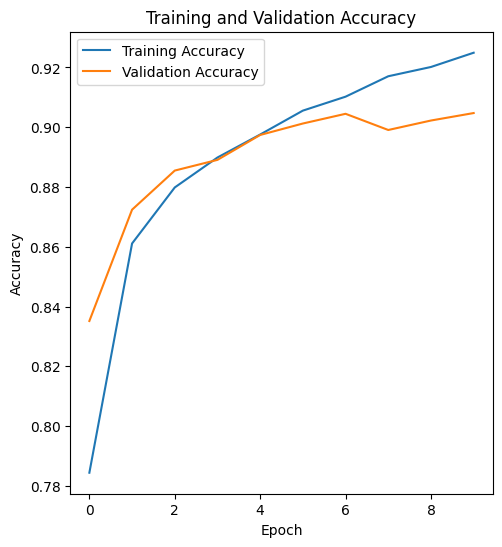

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

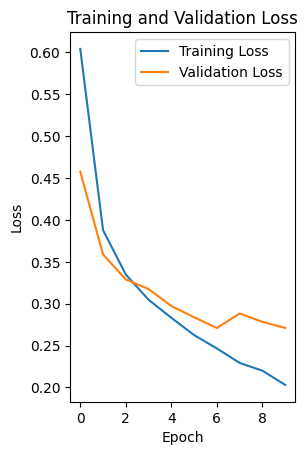

In [ ]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


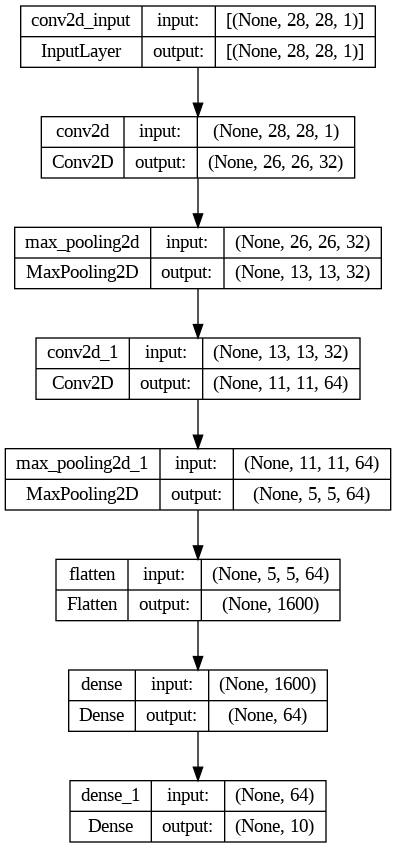

In [ ]:
from tensorflow.keras.utils import plot_model

# ... (previous code for model architecture)

# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)